<a href="https://colab.research.google.com/github/Leo-Lifeblood/Projects/blob/main/Multi_Armed_Bandit_Gradient_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random

In [ ]:
class bandit:
  def __init__(self, mean=0, var=1):
    self.mean = mean
    self.var = var
  def __call__(self):
    return np.random.normal(self.mean, self.var)
  def __repr__(self):
    return f"mean: {self.mean}, var: {self.var}"


class multi_armed_bandit:
  def __init__(self, k=10):
    self.k = k
    self.means = np.random.uniform(-10,10,k)
    self.vars = np.random.uniform(1,3,k)
    self.arms = [bandit(self.means[col], self.vars[col]) for col in range(k)]

  def __call__(self, action):
    return self.arms[action]()

  def __repr__(self):
    return f"k: {self.k}, arms: {self.arms}"

class agent:
  def __init__(self, k):
    self.k = k
    self.Q = np.zeros(self.k)

  def __call__(self):
    exponentiated = np.exp(self.Q)
    probs = exponentiated / np.sum(exponentiated)
    return np.random.choice(self.k, p=probs)

  def return_probs(self):
    exponentiated = np.exp(self.Q)
    probs = exponentiated / np.sum(exponentiated)
    return probs

  def update_Q(self, action, reward):
    self.Q[action] = self.Q[action] + 0.01*(reward - self.Q[action])



In [ ]:
import matplotlib.pyplot as plt
from IPython.display import clear_output

class bandit_solution:
  def __init__(self, k=10, steps_to_visualize=100):
    self.steps_to_visualize = steps_to_visualize
    self.k = k
    self.bandit = multi_armed_bandit(k)
    self.agent = agent(k)

    self.maximum_expectation = self.bandit.means.max()

    self.expectations = []
    self.regrets = []

    self.step_count = 0

  def take_step(self):
    self.step_count += 1
    action = self.agent()
    reward = self.bandit(action)
    self.agent.update_Q(action, reward)
    expectation = (self.bandit.means*self.agent.return_probs()).sum()
    regret = self.maximum_expectation - expectation
    self.regrets.append(regret)
    self.expectations.append(expectation)
    if self.step_count % self.steps_to_visualize == 0:
      self.plot()

  def plot(self):
    fig, axes = plt.subplots(3, 2, figsize=(12, 8))

    axes[0, 0].plot(self.expectations)
    axes[0, 0].set_xlabel("Steps")
    axes[0, 0].set_ylabel("Expectations")
    axes[0, 0].set_title("Expectations over time")
    axes[0, 0].axhline(y=self.maximum_expectation)


    axes[0, 1].bar(range(self.k), self.agent.return_probs())
    axes[0, 1].set_xlabel("Arm")
    axes[0, 1].set_ylabel("Probability")

    axes[1, 0].bar(range(self.k), self.bandit.means)
    axes[1, 0].set_xlabel("Arm")
    axes[1, 0].set_ylabel("Mean")

    axes[1, 1].bar(range(self.k), self.agent.Q)
    axes[1, 1].set_xlabel("Arm")
    axes[1, 1].set_ylabel("Q-value")

    axes[2, 0].plot(np.cumsum(self.regrets))
    axes[2, 0].set_xlabel("Steps")
    axes[2, 0].set_ylabel("Regret")
    axes[2, 0].set_title("Regret over time")

    plt.tight_layout()
    plt.show()
    clear_output(wait=True)

  def run(self, n_steps):
    for i in range(n_steps):
      self.take_step()





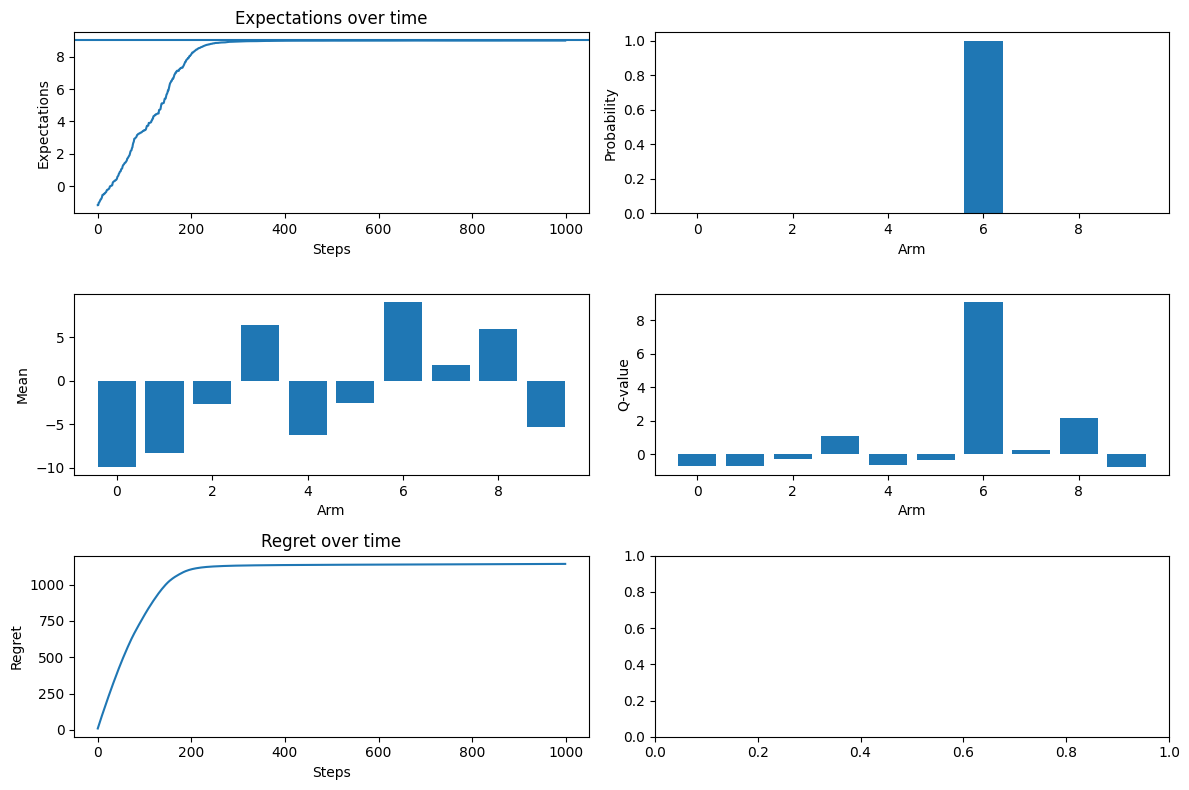

In [ ]:
s = bandit_solution(k=10, steps_to_visualize=100)
s.run(1000)

In [ ]:
s.agent.return_probs()

array([7.14397540e-05, 8.71487407e-05, 2.47826240e-04, 3.57985719e-04,
       1.59384770e-04, 8.48857229e-05, 4.54974598e-04, 1.96021163e-04,
       9.98289771e-01, 5.05620405e-05])

In [ ]:
s.bandit.means

array([-2.81329506, -0.68844546,  6.74892142,  8.24554056,  3.56483434,
       -0.65284703,  7.48692667,  3.89574692,  9.46155279, -7.29810612])